## Party Manifesto 'Redistributiveness' vs Electorate Income

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re, os
import pickle

In [3]:
def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    val, weight = val[~np.isnan(val)],weight[~np.isnan(val)]
    return (val * weight).sum() / weight.sum()

flatten = lambda l: [item for sublist in l for item in sublist]

In [4]:
dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

Manifesto_Project_Dataset_version_2019b = "MPDataset_MPDS2019b_stata14.dta"

manifest_project = pd.read_pickle(dataset_folder+Manifesto_Project_Dataset_version_2019b.replace("dta","zip"),compression='zip')
with open(Manifesto_Project_Dataset_version_2019b.replace("dta","_labels.zip"), 'rb') as fname:
    ESS_labels = pickle.load(fname)
with open(Manifesto_Project_Dataset_version_2019b.replace("dta","_header.zip"), 'rb') as fname:
    ESS_header = pickle.load(fname)


EuropeanSocialSurvey9_2018_v2_integrated = "ESS9e02.dta"

ESS = pd.read_pickle(dataset_folder+EuropeanSocialSurvey9_2018_v2_integrated.replace("dta","zip"),compression='zip')
with open(EuropeanSocialSurvey9_2018_v2_integrated.replace("dta","_labels.zip"), 'rb') as fname:
    ESS_labels = pickle.load(fname)
with open(EuropeanSocialSurvey9_2018_v2_integrated.replace("dta","_header.zip"), 'rb') as fname:
    ESS_header = pickle.load(fname)

In [8]:
manifest_project["country"].value_counts().shape

(56,)

In [12]:
manifest_project["edate"].min(),manifest_project["edate"].max()

(Timestamp('1920-11-02 00:00:00'), Timestamp('2018-10-06 00:00:00'))

In [29]:
min_voter_sample_size = 100

## ess party vote variables
vote_vars = ['prtvtcat',
 'prtvtdbe',
 'prtvtdbg',
 'prtvtgch',
 'prtvtbcy',
 'prtvtecz',
#  'prtvede1',
 'prtvede2',
 'prtvtgee',
 'prtvtees',
 'prtvtdfi',
 'prtvtdfr',
 'prtvtcgb',
 'prtvtahr',
 'prtvtfhu',
 'prtvtcie',
 'prtvtcit',
 'prtvblt1',
#  'prtvblt2',
#  'prtvblt3',
 'prtvtalv',
 'prtvtme',
 'prtvtgnl',
 'prtvtbno',
 'prtvtdpl',
 'prtvtcpt',
 'prtvtrs',
 'prtvtcse',
 'prtvtfsi',
 'prtvtdsk']

# this was tedious - and will have to update if looking at different period/reduce sample size!
ESS_big_parties_to_CMP_parties = {'Ã\x96VP':42520, 'SPÃ\x96':42320, 'FPÃ\x96':42420, 'GrÃ¼ne':42110,#Austria
 'N-VA':21916, 'PS':21322, 'CD&V':21521,  'MR':21426,#Belgium
 'Grazhdani za evropeiÌ\x86sko razvitie na Bulgariya (GERB)':80510,
       'Balgarska sotsialisticheska partiya (BSP)':80220,
       'Dvizhenie za prava i svobodi (DPS)':80951,#Bulgaria 
       'Social Democratic Party / Socialist Party':43320, 'FDP. The Liberals':43420,
           "Swiss People's Party":43810,#Swizterland
       'Democratic Rally (DISY)':55711,#Cyprus
       'ANO 2011':82430,'ODS':82413, 'Ä\x8cSSD':82320,
         'Ä\x8ceskÃ¡ pirÃ¡tskÃ¡ strana':82953, 'KSÄ\x8cM':82220,#Czechia
       'Christian Democratic Union/Christian Social Union (CDU/CSU)':41521,
           'Social Democratic Party (SPD)':41320,
           'Alliance 90/The Greens (BÃ¼ndnis 90/Die GrÃ¼nen)':41113,
           'Free Democratic Party (FDP)':41420, 'The Left (Die Linke)':41223,
           'Alternative for Germany (AFD)':41953,#Germany
       'Eesti Reformierakond':83430,
       'Eesti Keskerakond':83411, 'Sotsiaaldemokraatlik Erakond':83410,
       'Erakond Isamaa ja Res Publica Liit':83611,#Estonia
       'PSOE':33320, 'PP':33610,'Unidas Podemos':33210, 'VOX':np.nan,#Spain
       'The National Coalition Party':14620,
           'The Centre Party':14810, 'Social Democratic Party':14320, 'Green League':14110,
           'True Finns':14820,#Finland
     'LREM (LA RÃ\x89PUBLIQUE EN MARCHE)':31425,
       'LR (LES RÃ\x89PUBLICAINS)':31626, 'PS (Parti Socialiste)':31320,
       'FN (Front National)':31720,#France
         'Conservative':51620, 'Labour':51320, 'Liberal Democrat':51421,#United Kingdom
 'Narodna koalicija - SDP, HNS, HSU, HSS':81032,  'Hrvatska demokratska zajednica (HDZ)':81711,#Croatia
       'Fidesz (Fidesz Magyar PolgÃ¡ri PÃ¡rt)':86421,
       'Jobbik (Jobbik MagyarorszÃ¡gÃ©rt Mozgalom)':86710,
       'MSZP (Magyar Szocialista PÃ¡rt)':86320,#Hungary
 'Fine Gael':53520, 'Fianna FÃ¡il':53620,
       'Independent':53981, 'Sinn FÃ©in':53951,#Ireland
 'Movimento 5 Stelle':32956,
       'Partido Democratico (PD)':32440, 'Lega Nord':32720,#Italy
       'Lithuanian Peasant and Greens Union (LVZS)':88820,
       'Homeland Union - Lithuanian Christian Democrats (TS-LKD)':88621,
       'Lithuanian Social Democratic Party (LSDP)':88320,#Lithuania
 
       'DPS - Milo Ä\x90ukanoviÄ\x87':91220,#Montenegro
 
       "People's Party for Freedom and Democracy":22955, "Democrats '66":22330,
       'Green Left':22110, 'Christian Democratic Appeal':22521,#Netherlands
 'HÃ¸yre':12620,
       'Arbeiderpartiet':12320, 'Fremskrittspartiet':12951,#Norway
       'Prawo i SprawiedliwoÅ\x9bÄ\x87':92436, 'Platforma Obywatelska':92435,#Poland
       'PS - Partido Socialista':35311,
       'PPD-PSD/CDS-PP - Portugal Ã\xa0 Frente':35313,#Portugal
       'Aleksandar VuÄ\x8diÄ\x87-Srbija pobeÄ\x91uje':95071,#Serbia
       'Socialdemokraterna':11320, 'Moderata samlingspartiet':11620, 'Centern':11810,
       'Sverigedemokraterna':11710, 'VÃ¤nsterpartiet':11220,#Sweden
       'SDS - Slovenska demokratska stranka':97330,
       'LMÅ\xa0 - Lista Marjana Å\xa0arca':np.nan,#Slovenia
 'Smer â\x80\x93 SD':96423#Slovakia]
}


votes_country_dict = {x:re.sub("Party voted for in last national election\s?\d?, ","",ESS_header[x])\
                      .replace('France (ballot 1)',"France")\
                      .replace('Ireland (derived from 1st preference','Ireland')\
                      .replace('Lithuania (first vote, party)','Lithuania')
                      for x in vote_vars}

big_parties_by_country_dict = {}
for vote_var in votes_country_dict.keys():
    big_parties_by_country_dict[ votes_country_dict[vote_var] ] = list(ESS[vote_var].value_counts()[ESS[vote_var].value_counts()>=min_voter_sample_size].index)
big_parties_by_country_dict


# ESS[list(votes_country_dict.keys())].notnull().sum(axis=1).sort_values()
# note - checked, there's no overlap between different elections!

# get the overlap set for parties in both datasets who were in the most recent election
ESS_big_party_list_overlap = [x for x in ESS_big_parties_to_CMP_parties.keys() if pd.notnull(ESS_big_parties_to_CMP_parties[x])]
party_voted_in_last_nat_election = ESS[list(votes_country_dict.keys())].fillna(axis=1,method ='ffill')[list(votes_country_dict.keys())[-1]]
party_voted_in_last_nat_election.loc[party_voted_in_last_nat_election.apply(lambda x: x not in ESS_big_party_list_overlap)] = np.nan

# this is ... a bit much for one line!
voting_country = ESS[list(votes_country_dict.keys())].notnull().idxmax(axis=1).map(votes_country_dict)
voting_country.loc[party_voted_in_last_nat_election.apply(lambda x: x not in ESS_big_party_list_overlap)] = np.nan



In [30]:
deciles = ESS['hinctnta'].cat.codes.replace(-1,np.nan)
ESS["income_deciles_wts"] = list(zip(deciles,ESS["pspwght"]))
weighted_income_deciles_by_party = ESS["income_deciles_wts"].groupby(party_voted_in_last_nat_election).agg(weighted_mean).sort_values().reset_index()
weighted_income_deciles_by_party.columns = ["party","mean_inc_decile"]
# weighted_income_deciles_by_party

In [31]:
#### FILTER BY PROGRAMME TYPE!

In [32]:
# another shocking single line function
cmp_overlap_df = manifest_project[manifest_project["party"].apply(lambda x: x in ESS_big_parties_to_CMP_parties.values())].sort_values(by="edate").groupby("party").last()
cmp_overlap_df = cmp_overlap_df.sort_index()

In [33]:
# "redistributiveness" measure
manifesto_redist = cmp_overlap_df[["per"+x for x in ["404","405","409","413","504","701"]]].sum(axis=1)

In [34]:
weighted_income_deciles_by_party["party"] = weighted_income_deciles_by_party["party"].map(ESS_big_parties_to_CMP_parties)
weighted_income_deciles_by_party = weighted_income_deciles_by_party.set_index("party")
weighted_income_deciles_by_party = weighted_income_deciles_by_party["mean_inc_decile"].sort_index()

In [35]:
cmp_overlap_df["weighted_income_deciles"] = weighted_income_deciles_by_party
cmp_overlap_df["manifesto_redist"] = manifesto_redist

cmp_overlap_df["partyabbrev_filled"] = cmp_overlap_df["partyabbrev"].astype('object')
cmp_overlap_df.loc[cmp_overlap_df["partyabbrev"]=="","partyabbrev_filled"] = cmp_overlap_df[cmp_overlap_df["partyabbrev"]==""]["partyname"].astype('object')

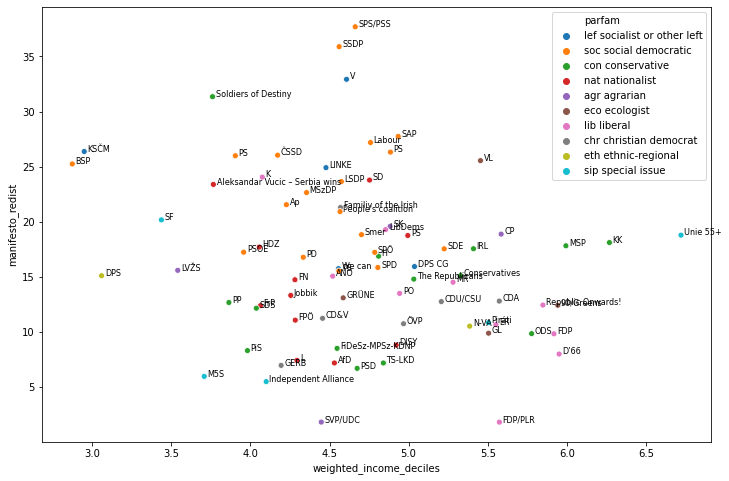

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = cmp_overlap_df,x="weighted_income_deciles",y="manifesto_redist",
                hue="parfam");

# make size = percentage of the vote? "pervote"

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=8)

label_point(cmp_overlap_df["weighted_income_deciles"],
            cmp_overlap_df["manifesto_redist"],
            cmp_overlap_df["partyabbrev_filled"], plt.gca())  

In [37]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show,  output_notebook
from bokeh.layouts import column, row
from bokeh.embed import components
from bokeh.transform import factor_cmap
from bokeh.models import HoverTool
from bokeh.models import Span, Label
from bokeh.models import BoxAnnotation


output_notebook()

Loading BokehJS ...

In [38]:
cmp_overlap_df["parfam"] = cmp_overlap_df["parfam"].cat.remove_unused_categories()
cmp_overlap_df["parfam"].value_counts()

soc social democratic          19
con conservative               14
nat nationalist                11
lib liberal                    10
chr christian democrat          6
sip special issue               5
lef socialist or other left     5
agr agrarian                    4
eco ecologist                   4
eth ethnic-regional             2
Name: parfam, dtype: int64

In [39]:
party_colour_dict = {'eco ecologist':'green', 'lef socialist or other left':'pink', 'soc social democratic':'red',
       'lib liberal':'orange', 'chr christian democrat':'darkblue', 'con conservative':'lightblue',
       'nat nationalist':'purple', 'agr agrarian':'brown', 'eth ethnic-regional':'yellow',
       'sip special issue':'olive'}

In [59]:
cmp_overlap_df["pervote_smaller"] = cmp_overlap_df["pervote"]/2

In [82]:

# colours = mps["party"].replace(party_colour_dict).values
colors = factor_cmap('parfam', palette=list(party_colour_dict.values()), factors=list(party_colour_dict.keys()))

hover = HoverTool(tooltips = [('name','@partyname'),
                              ('party family','@parfam'),
                              ('country','@countryname'),
                              ('date','@date'),
                              ('right-left','@rile'),
                              ('planned economy','@planeco'),
                              ('market economy','@markeco'),
                              ('welfare','@welfare'),
                              ('intpeace','@intpeace')])

p1 = figure(plot_width=950, plot_height=400, title="Party Manifesto 'Redistributiveness' by Mean Electorate Income Decile",
            tools='box_select,pan,wheel_zoom,box_zoom,reset', active_drag="box_select",
            x_axis_label = "weighted_income_deciles",y_axis_label="manifesto_redist",)
for family in cmp_overlap_df["parfam"].cat.categories:
    mask = cmp_overlap_df["parfam"]==family
    source = ColumnDataSource(cmp_overlap_df[mask])
    p1.scatter('weighted_income_deciles', 'manifesto_redist',source=source,
               fill_color=party_colour_dict[family], line_color = party_colour_dict[family], alpha=0.7,
               legend_label=family,size='pervote_smaller')
    
#     p1.scatter('weighted_income_deciles', 'manifesto_redist', source=source, fill_color=colors, line_color = colors, alpha=0.7,
#               legend_group='parfam',size='pervote_smaller',)
p1.add_tools(hover)
p1.legend.location = "top_left"
p1.legend.click_policy="hide"
show(p1)

In [41]:
cmp_overlap_df["edate"].min(),cmp_overlap_df["edate"].max(),

# 80 between 1994 and 2018

(Timestamp('1994-05-03 00:00:00'), Timestamp('2018-09-09 00:00:00'))